## imports

### import packages

In [ ]:
#-*-coding:utf-8-*-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import os

import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

In [ ]:
sns.set_style('whitegrid')

### import data

#### ohlcv_data

In [ ]:
zip_file_list = ['commodity.zip', 'currency.zip', 'ohlcv_data.zip']
for zip_file in zip_file_list:
  name = zip_file.split(".")[0]
  with ZipFile(zip_file, 'r') as zip:
    zip.extractall(f'{name}/')
  print('Done')

Done
Done
Done


In [ ]:
# ohlcv 데이터 중 가장 시작 날짜가 늦은 게 무엇인지 알아보자
path = './ohlcv_data/'
ohlcv_file_list = os.listdir(path)
ohlcv_file_list = [file for file in ohlcv_file_list if file.endswith('.csv')]

In [ ]:
# 제일 늦은 것은 2016-03-03 Nikkey225
# 따라서 2016-03-03부터의 데이터를 사용하기로 한다.
# 또한 수익률을 측정해야하기 때문에 pct_change()를 사용해 수익률에 해댱하는 열을 만들어줘야한다.
for file in ohlcv_file_list:
  name = file.split('.')[0]
  df = pd.read_csv(f'ohlcv_data/{file}')
  start_date = df.Date[0]
  print(name, ": ", start_date)

KODEX200 :  2002-10-14
TIGER원유선물(H) :  2010-08-02
KBSTAR중기우량회사채 :  2011-04-15
TIGER미국SP500선물(H) :  2011-07-18
KODEX인버스 :  2009-09-16
TIGER코스닥150 :  2015-11-12
TIGER유로스탁스50(H) :  2014-04-30
KOSEF국고채10년 :  2011-10-20
KODEX골드선물(H) :  2010-10-01
KOSEF미국달러선물인버스 :  2011-04-01
KINDEX일본Nikkey225(H) :  2016-03-03
KOSEF미국달러선물 :  2011-02-24
TIGER차이나CSI300 :  2014-02-17
KOSEF단기자금 :  2010-07-29
TIGER단기선진하이일드(H) :  2014-03-24


In [ ]:
def import_ohlcv_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  df["Rate"] = df['Close'].pct_change()
  df.dropna(inplace=True)
  df['Rate'] = (np.exp(np.log(df["Rate"]+1).rolling(10).sum())-1).shift(-10)
  df.dropna(inplace=True)
  
  return df

In [ ]:
# 데이터 가져오기
KOSEF국고채10년 = import_ohlcv_data('2016-03-03', 'KOSEF국고채10년.csv')
TIGER원유선물 = import_ohlcv_data('2016-03-03', 'TIGER원유선물(H).csv')
KBSTAR중기우량회사채 = import_ohlcv_data('2016-03-03', 'KBSTAR중기우량회사채.csv')
KOSEF미국달러선물 = import_ohlcv_data('2016-03-03', 'KOSEF미국달러선물.csv')
TIGER차이나CSI300 = import_ohlcv_data('2016-03-03', 'TIGER차이나CSI300.csv')
KODEX200 = import_ohlcv_data('2016-03-03', 'KODEX200.csv')
KOSEF미국달러선물인버스 = import_ohlcv_data('2016-03-03', 'KOSEF미국달러선물인버스.csv')
KINDEX일본Nikkey225 = import_ohlcv_data('2016-03-03', 'KINDEX일본Nikkey225(H).csv')
KOSEF단기자금 = import_ohlcv_data('2016-03-03', 'KOSEF단기자금.csv')
TIGER유로스탁스50 = import_ohlcv_data('2016-03-03', 'TIGER유로스탁스50(H).csv')
KODEX골드선물 = import_ohlcv_data('2016-03-03', 'KODEX골드선물(H).csv')
TIGER미국SP500선물 = import_ohlcv_data('2016-03-03', 'TIGER미국SP500선물(H).csv')
TIGER코스닥150 = import_ohlcv_data('2016-03-03', 'TIGER코스닥150.csv')
TIGER단기선진하이일드 = import_ohlcv_data('2016-03-03', 'TIGER단기선진하이일드(H).csv')
KODEX인버스 = import_ohlcv_data('2016-03-03', 'KODEX인버스.csv')

In [ ]:
etf_list = [TIGER단기선진하이일드, TIGER코스닥150, TIGER유로스탁스50, KODEX인버스,
            KODEX골드선물, KODEX200, KOSEF단기자금, KOSEF미국달러선물, TIGER원유선물,
            TIGER미국SP500선물, KOSEF국고채10년, KBSTAR중기우량회사채, TIGER차이나CSI300,
            KOSEF미국달러선물인버스, KINDEX일본Nikkey225]
name_list = []
for file in ohlcv_file_list:
  name_list.append(file.split('.')[0])

close_dict = {}
for i in range(len(etf_list)):
  name = name_list[i] +'_Close'
  close_dict[name] = etf_list[i].Close

close_price = pd.DataFrame(close_dict)
close_price['Date'] = KODEX200.Date
close_price

,KODEX200_Close,TIGER원유선물(H)_Close,KBSTAR중기우량회사채_Close,TIGER미국SP500선물(H)_Close,KODEX인버스_Close,TIGER코스닥150_Close,TIGER유로스탁스50(H)_Close,KOSEF국고채10년_Close,KODEX골드선물(H)_Close,KOSEF미국달러선물인버스_Close,KINDEX일본Nikkey225(H)_Close,KOSEF미국달러선물_Close,TIGER차이나CSI300_Close,KOSEF단기자금_Close,TIGER단기선진하이일드(H)_Close,Date
1,9530,10413,9645,8250,9745,21245,93723,11972,3600,23275,110863,94041,6848,10410,10540,2016-03-04
2,9565,10360,9640,8230,9725,21288,93728,11928,3765,23290,110867,94201,6880,10430,10515,2016-03-07
3,9570,10368,9635,8295,9790,21137,93718,11981,3800,23265,111188,94201,6819,10385,10465,2016-03-08
4,9565,10432,9580,8260,9685,21232,93741,12098,3745,23215,111132,94069,6796,10300,10360,2016-03-09
5,9555,10489,9590,8200,9640,21424,93728,11967,3810,23255,111026,94243,6810,10415,10480,2016-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,11840,12550,12630,4520,12420,34480,101355,13280,5585,46620,111475,102685,9870,9430,17580,2022-05-26
1534,11895,12575,12895,4470,12475,34845,101360,13165,5745,47640,111785,102630,9845,9510,17705,2022-05-27
1535,12050,12740,13220,4410,12530,35300,101365,12985,5835,49315,111825,102775,9890,9635,18020,2022-05-30
1536,12065,12830,13230,4395,12445,35440,101365,12975,5985,48870,110750,102535,10000,9655,18040,2022-05-31


In [ ]:
etf_list = [TIGER단기선진하이일드, TIGER코스닥150, TIGER유로스탁스50, KODEX인버스,
            KODEX골드선물, KODEX200, KOSEF단기자금, KOSEF미국달러선물, TIGER원유선물,
            TIGER미국SP500선물, KOSEF국고채10년, KBSTAR중기우량회사채, TIGER차이나CSI300,
            KOSEF미국달러선물인버스, KINDEX일본Nikkey225]
name_list = []
for file in ohlcv_file_list:
  name_list.append(file.split('.')[0])

volume_dict = {}
for i in range(len(etf_list)):
  name = name_list[i] +'_Volume'
  volume_dict[name] = etf_list[i].Volume

volume = pd.DataFrame(volume_dict)
volume['Date'] = KODEX200.Date
volume

,KODEX200_Volume,TIGER원유선물(H)_Volume,KBSTAR중기우량회사채_Volume,TIGER미국SP500선물(H)_Volume,KODEX인버스_Volume,TIGER코스닥150_Volume,TIGER유로스탁스50(H)_Volume,KOSEF국고채10년_Volume,KODEX골드선물(H)_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume,KOSEF미국달러선물_Volume,TIGER차이나CSI300_Volume,KOSEF단기자금_Volume,TIGER단기선진하이일드(H)_Volume,Date
1,201,429737,3274,16488203,142158,7658963,402337,28062,2126369,20731,90,3,512798,11432,25,2016-03-04
2,384,422480,10172,9586362,67391,6940749,247118,56605,3942217,26105,98,82,490423,114302,308662,2016-03-07
3,2,421993,7420,16426298,126211,6926830,200878,25354,3438044,4126,14,0,507145,3178,336969,2016-03-08
4,2,436810,4272,12569213,47065,6053743,719311,10249,1870277,27461,779,104,484589,704,316169,2016-03-09
5,1,423083,5708,22581765,34029,9241212,165302,14659,1862786,10555,762,55,491465,1165,310932,2016-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,765,34923,5096,30707084,91032,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167,2022-05-26
1534,6539,57969,5421,22242701,25286,5885635,332,4403,214061,49455,8617,2094,22553,7765,37,2022-05-27
1535,1645,36109,7673,21054841,62669,5384386,1387,7401,174185,77031,10109,1951,43495,3919,2738,2022-05-30
1536,1091,54269,2349,28463402,50373,5485464,3135,6087,232165,84087,25461,474,70637,47453,816,2022-05-31


#### famma_french_daily_factor는 4/29 이후로 업데이트가 중단되어 사용하기가 어려울 것으로 보인다...

#### currency 

In [ ]:
Currency = pd.read_csv('currency/currency.csv')
Currency = Currency[Currency.Date >= '2016-03-04'].reset_index(drop=True) # 시작하는 날짜보다 뒤에 있는 것만 가져오기

In [ ]:
currency_list = ['USD', 'JPY', 'CNY', 'EUR']  # 환율 마다 스케일이 다르기 때문에 환율의 변화율로 보는 것이 더 적합하다.
for currency in currency_list:                # 따라서 환율의 변화율을 변수로 설정해주도록 한다.
  col = currency + ' Change'
  Currency[col] = Currency[currency].pct_change()

Currency.drop(currency_list, axis=1, inplace=True)
Currency.fillna(0, inplace=True)

In [ ]:
Currency.head()

,Date,USD Change,JPY Change,CNY Change,EUR Change
0,2016-03-04,0.000000,0.000000,0.000000,0.000000
1,2016-03-07,0.001160,0.003778,-0.000217,0.002078
2,2016-03-08,0.008626,0.015867,0.010156,0.007431
3,2016-03-09,-0.000322,-0.007512,-0.001828,-0.000548
4,2016-03-10,-0.003645,-0.000544,-0.001885,0.013024


#### Commodity

In [ ]:
path = './commodity/'
commodity_file_list = os.listdir(path)
commodity_file_list = [file for file in commodity_file_list if file.endswith('.csv')]

In [ ]:
def import_commodity_data(start, file):
  file_path = f'commodity/{file}'  # 파일 불러오기
  name = file.split('.')[0]
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  df = df.iloc[:,:2]                                # Date를 뺀 가장 첫번째 열이 모두 가격을 나타내므로 이것만을 사용하기로 한다
  df.columns = ['Date', f'{name} Price']                    # 열 이름을 똑같이 변경
  return df

In [ ]:
gold = import_commodity_data('2016-03-04', 'gold.csv')
silver = import_commodity_data('2016-03-04', 'silver.csv')
natural_gas = import_commodity_data('2016-03-04', 'natural_gas.csv')
oil = import_commodity_data('2016-03-04', 'oil.csv')

In [ ]:
gold

,Date,gold Price
0,2016-03-04,1279.900024
1,2016-03-07,1272.300049
2,2016-03-08,1276.300049
3,2016-03-09,1260.000000
4,2016-03-10,1273.000000
...,...,...
1578,2022-06-13,1873.800049
1579,2022-06-14,1825.500000
1580,2022-06-15,1839.000000
1581,2022-06-16,1850.599976


## Make Model

### preparation

In [ ]:
print(ohlcv_file_list)
print(commodity_file_list)
print(['Currency'])

['KODEX200.csv', 'TIGER원유선물(H).csv', 'KBSTAR중기우량회사채.csv', 'TIGER미국SP500선물(H).csv', 'KODEX인버스.csv', 'TIGER코스닥150.csv', 'TIGER유로스탁스50(H).csv', 'KOSEF국고채10년.csv', 'KODEX골드선물(H).csv', 'KOSEF미국달러선물인버스.csv', 'KINDEX일본Nikkey225(H).csv', 'KOSEF미국달러선물.csv', 'TIGER차이나CSI300.csv', 'KOSEF단기자금.csv', 'TIGER단기선진하이일드(H).csv']
['silver.csv', 'oil.csv', 'natural_gas.csv', 'gold.csv']
['Currency']


In [ ]:
ohlcv_list = [KOSEF국고채10년, 
 TIGER원유선물,
 KBSTAR중기우량회사채,
 KOSEF미국달러선물,
 TIGER차이나CSI300,
 KODEX200,
 KOSEF미국달러선물인버스,
 KINDEX일본Nikkey225,
 KOSEF단기자금,
 TIGER유로스탁스50,
 KODEX골드선물,
 TIGER미국SP500선물,
 TIGER코스닥150,
 TIGER단기선진하이일드,
 KODEX인버스]
commodity_list = [gold, natural_gas, oil, silver]
economy_list = [Currency]
total_feature_list = commodity_list  +economy_list+ [close_price]+[volume]

In [ ]:
def merge_data_set(dataset, feature_list):
  df = dataset
  for feature in feature_list:
    df = pd.merge(df, feature, how='left')
  df[['USD Change', 'JPY Change', 'CNY Change', 'EUR Change']] = df[['USD Change', 'JPY Change', 'CNY Change', 'EUR Change']].fillna(0)
  df = df.fillna(method='ffill')
  return df

### KODEX200

In [ ]:
feature_list = total_feature_list
KODEX200_combined = merge_data_set(KODEX200, feature_list)
KODEX200_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,TIGER코스닥150_Volume,TIGER유로스탁스50(H)_Volume,KOSEF국고채10년_Volume,KODEX골드선물(H)_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume,KOSEF미국달러선물_Volume,TIGER차이나CSI300_Volume,KOSEF단기자금_Volume,TIGER단기선진하이일드(H)_Volume
1532,2022-05-26,34595,34945,34355,34480,6777076,-0.042923,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167
1533,2022-05-27,34835,34985,34790,34845,5885635,-0.056680,1860.699951,8.895,115.300003,...,5885635,332,4403,214061,49455,8617,2094,22553,7765,37
1534,2022-05-30,35225,35340,35070,35300,5384386,-0.085411,1860.699951,8.895,115.300003,...,5384386,1387,7401,174185,77031,10109,1951,43495,3919,2738
1535,2022-05-31,35240,35505,35075,35440,5485464,-0.089588,1862.099976,8.916,119.980003,...,5485464,3135,6087,232165,84087,25461,474,70637,47453,816
1536,2022-06-02,35240,35275,34980,35055,5957733,-0.086436,1868.699951,9.057,117.769997,...,5957733,2035,6859,224767,23492,25208,79,51783,3388,1016


In [ ]:
KODEX200_combined.drop(['Date', 'KODEX200_Close','KODEX200_Volume'], axis=1, inplace=True)

In [ ]:
X = KODEX200_combined.drop('Rate', axis=1)
y = KODEX200_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.04819119922197018), 최대(0.056117442842312)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.38086006, 0.78612629,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.36200517, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.37609641, 0.21798984,
        1.        ],
       ...,
       [0.66963848, 0.66598717, 0.67604582, ..., 0.        , 0.26899409,
        0.00877789],
       [0.6703881 , 0.67419082, 0.67629813, ..., 0.00826143, 1.        ,
        0.0025247 ],
       [0.6703881 , 0.66275543, 0.67150426, ..., 0.        , 0.23244449,
        0.0031754 ]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1537, 41)

In [ ]:
num = 10
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1528, 10, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1528, 41)

In [ ]:
# 끝에 10개의 데이터는 사용하지 못함
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1528, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.019591304472051038
MAE: 0.015440932350960269
R2: -0.676609532637394


No handles with labels found to put in legend.


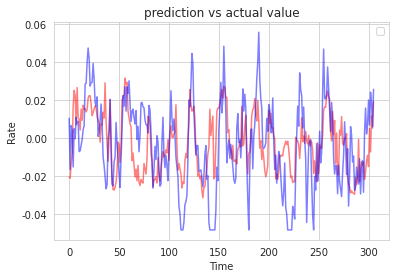

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

* 이전 6 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  #df["Rate"] = df['Close'].pct_change()
  #df.dropna(inplace=True)
  #df['Rate'] = (np.exp(np.log(df["Rate"]+1).rolling(5).sum())-1).shift(-5)
  #df.dropna(inplace=True)
  
  return df


KODEX200_predict = predict_data('2016-03-04', 'KODEX200.csv')
#KODEX200_predict.tail()
KODEX200_combined_predict = merge_data_set(KODEX200_predict, feature_list)
test=KODEX200_combined_predict.iloc[-num:]
test.drop(['Date', 'KODEX200_Close','KODEX200_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(10, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
#print(test.shape)

pred_kodex200=lgbm.predict(test)
pred_kodex200=pd.DataFrame({'prediction':pred_kodex200})
pred_kodex200.index = ["KODEX200"]
pred_kodex200.to_csv('Pred.csv', encoding='utf-8-sig')

### KODEX인버스

In [ ]:
feature_list = total_feature_list
KODEX인버스_combined = merge_data_set(KODEX인버스, feature_list)
KODEX인버스_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,TIGER코스닥150_Volume,TIGER유로스탁스50(H)_Volume,KOSEF국고채10년_Volume,KODEX골드선물(H)_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume,KOSEF미국달러선물_Volume,TIGER차이나CSI300_Volume,KOSEF단기자금_Volume,TIGER단기선진하이일드(H)_Volume
1532,2022-05-26,4505,4540,4455,4520,30707084,0.042035,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167
1533,2022-05-27,4465,4480,4450,4470,22242701,0.057047,1860.699951,8.895,115.300003,...,5885635,332,4403,214061,49455,8617,2094,22553,7765,37
1534,2022-05-30,4420,4445,4405,4410,21054841,0.092971,1860.699951,8.895,115.300003,...,5384386,1387,7401,174185,77031,10109,1951,43495,3919,2738
1535,2022-05-31,4410,4445,4385,4395,28463402,0.096701,1862.099976,8.916,119.980003,...,5485464,3135,6087,232165,84087,25461,474,70637,47453,816
1536,2022-06-02,4420,4455,4415,4445,19000946,0.092238,1868.699951,9.057,117.769997,...,5957733,2035,6859,224767,23492,25208,79,51783,3388,1016


In [ ]:
KODEX인버스_combined.drop(['Date', 'KODEX인버스_Close','KODEX인버스_Volume'], axis=1, inplace=True)

In [ ]:
X = KODEX인버스_combined.drop('Rate', axis=1)
y = KODEX인버스_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.055784088987799206), 최대(0.050348299229526654)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[1.        , 1.        , 1.        , ..., 0.38086006, 0.78612629,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.36200517, 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.37609641, 0.21798984,
        1.        ],
       ...,
       [0.14112903, 0.1397773 , 0.14367134, ..., 0.        , 0.26899409,
        0.00877789],
       [0.13875712, 0.1397773 , 0.13892187, ..., 0.00826143, 1.        ,
        0.0025247 ],
       [0.14112903, 0.14214641, 0.14604607, ..., 0.        , 0.23244449,
        0.0031754 ]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
X_scaled.shape

(1537, 41)

In [ ]:
num = 10
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1528, 10, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1528, 41)

In [ ]:
# 끝에 10개의 데이터는 사용하지 못함
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1528, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.021121038930684642
MAE: 0.01632476500118758
R2: -0.5626409616593997


No handles with labels found to put in legend.


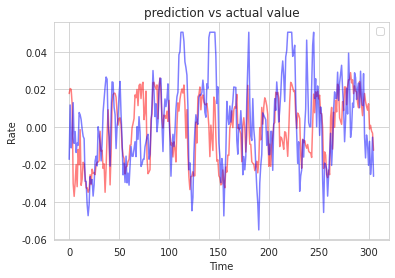

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

* 이전 10 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KODEX인버스_predict = predict_data('2016-03-04', 'KODEX인버스.csv')
KODEX인버스_combined_predict = merge_data_set(KODEX인버스_predict, feature_list)
test=KODEX인버스_combined_predict.iloc[-num:]
test.drop(['Date', 'KODEX인버스_Close','KODEX인버스_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(10, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_KODEX인버스 = lgbm.predict(test)
pred_KODEX인버스=pd.DataFrame({"prediction":pred_KODEX인버스})
pred_KODEX인버스.index = ['KODEX인버스']

pred_KODEX인버스.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER코스닥150

In [ ]:
feature_list = total_feature_list
TIGER코스닥150_combined = merge_data_set(TIGER코스닥150, feature_list)
TIGER코스닥150_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,TIGER코스닥150_Volume,TIGER유로스탁스50(H)_Volume,KOSEF국고채10년_Volume,KODEX골드선물(H)_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume,KOSEF미국달러선물_Volume,TIGER차이나CSI300_Volume,KOSEF단기자금_Volume,TIGER단기선진하이일드(H)_Volume
1532,2022-05-26,12725,12820,12475,12550,34923,-0.061753,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167
1533,2022-05-27,12805,12805,12505,12575,57969,-0.062823,1860.699951,8.895,115.300003,...,5885635,332,4403,214061,49455,8617,2094,22553,7765,37
1534,2022-05-30,12660,12770,12660,12740,36109,-0.099686,1860.699951,8.895,115.300003,...,5384386,1387,7401,174185,77031,10109,1951,43495,3919,2738
1535,2022-05-31,12740,12845,12670,12830,54269,-0.097038,1862.099976,8.916,119.980003,...,5485464,3135,6087,232165,84087,25461,474,70637,47453,816
1536,2022-06-02,12785,12790,12675,12695,182565,-0.094132,1868.699951,9.057,117.769997,...,5957733,2035,6859,224767,23492,25208,79,51783,3388,1016


In [ ]:
TIGER코스닥150_combined.drop(['Date', 'TIGER코스닥150_Close','TIGER코스닥150_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER코스닥150_combined.drop('Rate', axis=1)
y = TIGER코스닥150_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.07857641745969812), 최대(0.07605126464304779)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.25071678, 0.24338787, 0.25347519, ..., 0.38086006, 0.78612629,
        0.        ],
       [0.25819621, 0.24753967, 0.25268358, ..., 0.36200517, 1.        ,
        1.        ],
       [0.24791199, 0.23585312, 0.23210158, ..., 0.37609641, 0.21798984,
        1.        ],
       ...,
       [0.59944528, 0.59905892, 0.61825148, ..., 0.        , 0.26899409,
        0.00877789],
       [0.61191099, 0.61059171, 0.61983471, ..., 0.00826143, 1.        ,
        0.0025247 ],
       [0.61892296, 0.60213433, 0.62062633, ..., 0.        , 0.23244449,
        0.0031754 ]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
X_scaled.shape

(1537, 41)

In [ ]:
num = 10
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1528, 10, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1528, 41)

In [ ]:
# 끝에 10개의 데이터는 사용하지 못함
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1528, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.04469121332362672
MAE: 0.03850669403940799
R2: -9.036933343179872


No handles with labels found to put in legend.


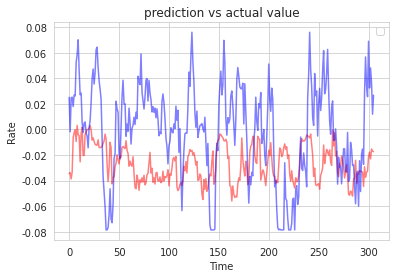

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER코스닥150_predict = predict_data('2016-03-04', 'TIGER코스닥150.csv')
TIGER코스닥150_combined_predict = merge_data_set(TIGER코스닥150_predict, feature_list)
test=TIGER코스닥150_combined_predict.iloc[-num:]
test.drop(['Date', 'TIGER코스닥150_Close','TIGER코스닥150_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(10, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_TIGER코스닥150 = lgbm.predict(test)
pred_TIGER코스닥150=pd.DataFrame({"prediction":pred_TIGER코스닥150})
pred_TIGER코스닥150.index = ['TIGER코스닥150']

pred_TIGER코스닥150.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KINDEX일본Nikkey225

In [ ]:
feature_list = total_feature_list
KINDEX일본Nikkey225_combined = merge_data_set(KINDEX일본Nikkey225, feature_list)
KINDEX일본Nikkey225_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,TIGER코스닥150_Volume,TIGER유로스탁스50(H)_Volume,KOSEF국고채10년_Volume,KODEX골드선물(H)_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume,KOSEF미국달러선물_Volume,TIGER차이나CSI300_Volume,KOSEF단기자금_Volume,TIGER단기선진하이일드(H)_Volume
1532,2022-05-26,17640,17650,17555,17580,10167,0.011661,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167
1533,2022-05-27,17805,17805,17620,17705,37,-0.003954,1860.699951,8.895,115.300003,...,5885635,332,4403,214061,49455,8617,2094,22553,7765,37
1534,2022-05-30,17835,18020,17835,18020,2738,-0.038846,1860.699951,8.895,115.300003,...,5384386,1387,7401,174185,77031,10109,1951,43495,3919,2738
1535,2022-05-31,18040,18045,17990,18040,816,-0.034645,1862.099976,8.916,119.980003,...,5485464,3135,6087,232165,84087,25461,474,70637,47453,816
1536,2022-06-02,17950,18140,17910,18140,1016,-0.058159,1868.699951,9.057,117.769997,...,5957733,2035,6859,224767,23492,25208,79,51783,3388,1016


In [ ]:
KINDEX일본Nikkey225_combined.drop(['Date', 'KINDEX일본Nikkey225(H)_Close','KINDEX일본Nikkey225(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = KINDEX일본Nikkey225_combined.drop('Rate', axis=1)
y = KINDEX일본Nikkey225_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.056327570596802885), 최대(0.06246221242393271)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler =MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.02496611, 0.01688999, 0.0318834 , ..., 0.38086006, 0.78612629,
        0.        ],
       [0.02553095, 0.01632699, 0.0233432 , ..., 0.36200517, 1.        ,
        1.        ],
       [0.02327158, 0.01407499, 0.0074015 , ..., 0.37609641, 0.21798984,
        1.        ],
       ...,
       [0.84907366, 0.85801149, 0.86255978, ..., 0.        , 0.26899409,
        0.00877789],
       [0.87223226, 0.86082648, 0.88020952, ..., 0.00826143, 1.        ,
        0.0025247 ],
       [0.86206507, 0.87152348, 0.87109998, ..., 0.        , 0.23244449,
        0.0031754 ]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 8
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1530, 8, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1530, 41)

In [ ]:
# 끝에 10개의 데이터는 사용하지 못함
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1530, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.028222700332970616
MAE: 0.022537287626777838
R2: -2.604935959283652


No handles with labels found to put in legend.


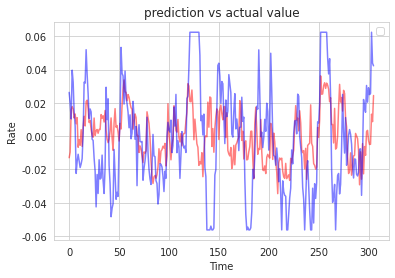

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KINDEX일본Nikkey225_predict = predict_data('2016-03-04', 'KINDEX일본Nikkey225(H).csv')
KINDEX일본Nikkey225_combined_predict = merge_data_set(KINDEX일본Nikkey225_predict, feature_list)
test=KINDEX일본Nikkey225_combined_predict.iloc[-num:]
test.drop(['Date', 'KINDEX일본Nikkey225(H)_Close','KINDEX일본Nikkey225(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(8, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_KINDEX일본Nikkey225 = lgbm.predict(test)
pred_KINDEX일본Nikkey225=pd.DataFrame({"prediction":pred_KINDEX일본Nikkey225})
pred_KINDEX일본Nikkey225.index = ['KINDEX일본Nikkey225']

pred_KINDEX일본Nikkey225.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER차이나CSI300

In [ ]:
feature_list = total_feature_list
TIGER차이나CSI300_combined = merge_data_set(TIGER차이나CSI300, feature_list)
TIGER차이나CSI300_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,TIGER코스닥150_Volume,TIGER유로스탁스50(H)_Volume,KOSEF국고채10년_Volume,KODEX골드선물(H)_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume,KOSEF미국달러선물_Volume,TIGER차이나CSI300_Volume,KOSEF단기자금_Volume,TIGER단기선진하이일드(H)_Volume
1532,2022-05-26,9920,9965,9760,9870,24393,0.057244,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167
1533,2022-05-27,9970,9995,9795,9845,22553,0.061453,1860.699951,8.895,115.300003,...,5885635,332,4403,214061,49455,8617,2094,22553,7765,37
1534,2022-05-30,9860,9980,9860,9890,43495,0.101618,1860.699951,8.895,115.300003,...,5384386,1387,7401,174185,77031,10109,1951,43495,3919,2738
1535,2022-05-31,9950,10010,9835,10000,70637,0.073000,1862.099976,8.916,119.980003,...,5485464,3135,6087,232165,84087,25461,474,70637,47453,816
1536,2022-06-02,10010,10085,9940,10070,51783,0.078947,1868.699951,9.057,117.769997,...,5957733,2035,6859,224767,23492,25208,79,51783,3388,1016


In [ ]:
TIGER차이나CSI300_combined.drop(['Date', 'TIGER차이나CSI300_Close','TIGER차이나CSI300_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER차이나CSI300_combined.drop('Rate', axis=1)
y = TIGER차이나CSI300_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.053939191421889625), 최대(0.05979074032090863)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.03618728, 0.02564771, 0.02947693, ..., 0.        , 0.78612629,
        0.        ],
       [0.04532736, 0.03886242, 0.04374601, ..., 0.00459369, 1.        ,
        1.        ],
       [0.04719269, 0.03662895, 0.00826105, ..., 0.        , 0.21798984,
        1.        ],
       ...,
       [0.59858235, 0.60914235, 0.61319515, ..., 0.14768708, 0.26899409,
        0.00877789],
       [0.61537027, 0.61472603, 0.60850137, ..., 0.03460578, 1.        ,
        0.0025247 ],
       [0.62656221, 0.62868523, 0.62821524, ..., 0.004364  , 0.23244449,
        0.0031754 ]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 9
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1529, 9, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1529, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1529, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.030240175048160903
MAE: 0.024224754566665542
R2: -4.810707434039341


No handles with labels found to put in legend.


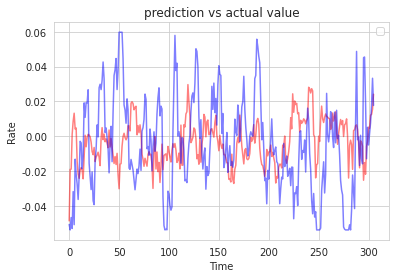

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER차이나CSI300_predict = predict_data('2016-03-04', 'TIGER차이나CSI300.csv')
TIGER차이나CSI300_combined_predict = merge_data_set(TIGER차이나CSI300_predict, feature_list)
test=TIGER차이나CSI300_combined_predict.iloc[-num:]
test.drop(['Date', 'TIGER차이나CSI300_Close','TIGER차이나CSI300_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(9, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_TIGER차이나CSI300 = lgbm.predict(test)
pred_TIGER차이나CSI300=pd.DataFrame({"prediction":pred_TIGER차이나CSI300})
pred_TIGER차이나CSI300.index = ['TIGER차이나CSI300']

pred_TIGER차이나CSI300.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER유로스탁스50

In [ ]:
feature_list = total_feature_list
TIGER유로스탁스50_combined = merge_data_set(TIGER유로스탁스50, feature_list)
TIGER유로스탁스50_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,TIGER코스닥150_Volume,TIGER유로스탁스50(H)_Volume,KOSEF국고채10년_Volume,KODEX골드선물(H)_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume,KOSEF미국달러선물_Volume,TIGER차이나CSI300_Volume,KOSEF단기자금_Volume,TIGER단기선진하이일드(H)_Volume
1532,2022-05-26,12780,12795,12630,12630,5096,-0.035234,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167
1533,2022-05-27,12945,12975,12895,12895,5421,-0.049244,1860.699951,8.895,115.300003,...,5885635,332,4403,214061,49455,8617,2094,22553,7765,37
1534,2022-05-30,13065,13250,13065,13220,7673,-0.079803,1860.699951,8.895,115.300003,...,5384386,1387,7401,174185,77031,10109,1951,43495,3919,2738
1535,2022-05-31,13275,13315,13105,13230,2349,-0.077475,1862.099976,8.916,119.980003,...,5485464,3135,6087,232165,84087,25461,474,70637,47453,816
1536,2022-06-02,13045,13045,12920,13000,14330,-0.082692,1868.699951,9.057,117.769997,...,5957733,2035,6859,224767,23492,25208,79,51783,3388,1016


In [ ]:
TIGER유로스탁스50_combined.drop(['Date', 'TIGER유로스탁스50(H)_Close','TIGER유로스탁스50(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER유로스탁스50_combined.drop('Rate', axis=1)
y = TIGER유로스탁스50_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.048863930111506595), 최대(0.04923138191955366)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.01079914, 0.00988822, 0.02705042, ..., 0.38086006, 0.78612629,
        0.        ],
       [0.01727862, 0.00881341, 0.02596841, ..., 0.36200517, 1.        ,
        1.        ],
       [0.01187905, 0.0066638 , 0.01190219, ..., 0.37609641, 0.21798984,
        1.        ],
       ...,
       [0.74730022, 0.77407567, 0.76714997, ..., 0.        , 0.26899409,
        0.00877789],
       [0.79265659, 0.78804815, 0.7758061 , ..., 0.00826143, 1.        ,
        0.0025247 ],
       [0.74298056, 0.7300086 , 0.73577148, ..., 0.        , 0.23244449,
        0.0031754 ]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 11
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1527, 11, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1527, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1527, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.025514794942344463
MAE: 0.02052210284680048
R2: -1.4836360393672567


No handles with labels found to put in legend.


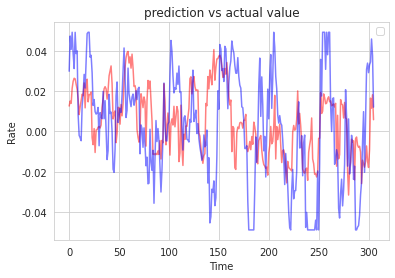

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER유로스탁스50_predict = predict_data('2016-03-04', 'TIGER유로스탁스50(H).csv')
TIGER유로스탁스50_combined_predict = merge_data_set(TIGER유로스탁스50_predict, feature_list)
test=TIGER유로스탁스50_combined_predict.iloc[-num:]
test.drop(['Date', 'TIGER유로스탁스50(H)_Close','TIGER유로스탁스50(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(11, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_TIGER유로스탁스50 = lgbm.predict(test)
pred_TIGER유로스탁스50=pd.DataFrame({"prediction":pred_TIGER유로스탁스50})
pred_TIGER유로스탁스50.index = ['TIGER유로스탁스50']

pred_TIGER유로스탁스50.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER미국SP500선물

In [ ]:
feature_list = total_feature_list
TIGER미국SP500선물_combined = merge_data_set(TIGER미국SP500선물, feature_list)
TIGER미국SP500선물_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,TIGER코스닥150_Volume,TIGER유로스탁스50(H)_Volume,KOSEF국고채10년_Volume,KODEX골드선물(H)_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume,KOSEF미국달러선물_Volume,TIGER차이나CSI300_Volume,KOSEF단기자금_Volume,TIGER단기선진하이일드(H)_Volume
1532,2022-05-26,46705,46980,46570,46620,14209,-0.036036,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167
1533,2022-05-27,47730,47735,47560,47640,49455,-0.062867,1860.699951,8.895,115.300003,...,5885635,332,4403,214061,49455,8617,2094,22553,7765,37
1534,2022-05-30,49015,49315,48945,49315,77031,-0.106256,1860.699951,8.895,115.300003,...,5384386,1387,7401,174185,77031,10109,1951,43495,3919,2738
1535,2022-05-31,49100,49105,48765,48870,84087,-0.094946,1862.099976,8.916,119.980003,...,5485464,3135,6087,232165,84087,25461,474,70637,47453,816
1536,2022-06-02,48050,48255,47960,48185,23492,-0.100446,1868.699951,9.057,117.769997,...,5957733,2035,6859,224767,23492,25208,79,51783,3388,1016


In [ ]:
TIGER미국SP500선물_combined.drop(['Date', 'TIGER미국SP500선물(H)_Close','TIGER미국SP500선물(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER미국SP500선물_combined.drop('Rate', axis=1)
y = TIGER미국SP500선물_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.051734259248413676), 최대(0.047078132864402156)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.38086006, 0.78612629,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.36200517, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.37609641, 0.21798984,
        1.        ],
       ...,
       [0.85960591, 0.86653554, 0.85936015, ..., 0.        , 0.26899409,
        0.00877789],
       [0.86259676, 0.85915988, 0.85302502, ..., 0.00826143, 1.        ,
        0.0025247 ],
       [0.82565095, 0.82930598, 0.82469292, ..., 0.        , 0.23244449,
        0.0031754 ]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 10
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1528, 10, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1528, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1528, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.02332576524032205
MAE: 0.01914403569007441
R2: -1.22058371375417


No handles with labels found to put in legend.


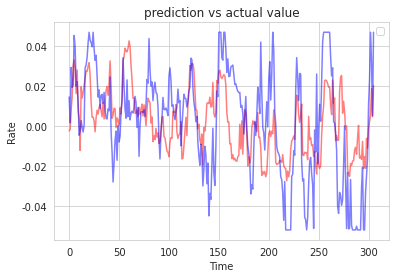

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER미국SP500선물_predict = predict_data('2016-03-04', 'TIGER미국SP500선물(H).csv')
TIGER미국SP500선물_combined_predict = merge_data_set(TIGER미국SP500선물_predict, feature_list)
test=TIGER미국SP500선물_combined_predict.iloc[-num:]
test.drop(['Date', 'TIGER미국SP500선물(H)_Close','TIGER미국SP500선물(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(10, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_TIGER미국SP500선물 = lgbm.predict(test)
pred_TIGER미국SP500선물=pd.DataFrame({"prediction":pred_TIGER미국SP500선물})
pred_TIGER미국SP500선물.index = ['TIGER미국SP500선물']

pred_TIGER미국SP500선물.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KODEX골드선물


In [ ]:
feature_list = total_feature_list
KODEX골드선물_combined = merge_data_set(KODEX골드선물, feature_list)
KODEX골드선물_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,TIGER코스닥150_Volume,TIGER유로스탁스50(H)_Volume,KOSEF국고채10년_Volume,KODEX골드선물(H)_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume,KOSEF미국달러선물_Volume,TIGER차이나CSI300_Volume,KOSEF단기자금_Volume,TIGER단기선진하이일드(H)_Volume
1532,2022-05-26,12475,12475,12390,12420,91032,0.009662,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167
1533,2022-05-27,12460,12480,12430,12475,25286,-0.014830,1860.699951,8.895,115.300003,...,5885635,332,4403,214061,49455,8617,2094,22553,7765,37
1534,2022-05-30,12425,12535,12420,12530,62669,-0.024741,1860.699951,8.895,115.300003,...,5384386,1387,7401,174185,77031,10109,1951,43495,3919,2738
1535,2022-05-31,12430,12455,12395,12445,50373,-0.011249,1862.099976,8.916,119.980003,...,5485464,3135,6087,232165,84087,25461,474,70637,47453,816
1536,2022-06-02,12405,12435,12380,12435,241053,-0.001608,1868.699951,9.057,117.769997,...,5957733,2035,6859,224767,23492,25208,79,51783,3388,1016


In [ ]:
KODEX골드선물_combined.drop(['Date', 'KODEX골드선물(H)_Close','KODEX골드선물(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = KODEX골드선물_combined.drop('Rate', axis=1)
y = KODEX골드선물_combined[['Rate']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.69183824, -0.68965259, -0.68896002, ...,  0.04623902,
         0.06351865, -0.29171209],
       [-0.67102846, -0.665487  , -0.68199508, ..., -0.00728443,
         1.69622436,  3.1341112 ],
       [-0.66062357, -0.64822586, -0.6471704 , ...,  0.03271642,
        -0.06748507,  3.44831455],
       ...,
       [ 1.18104178,  1.22978578,  1.20550274, ..., -1.07638513,
        -0.05572426, -0.2615982 ],
       [ 1.18451007,  1.17455014,  1.1880904 , ..., -1.01145849,
         0.63522753, -0.28293211],
       [ 1.16716859,  1.16074123,  1.17764299, ..., -1.05655933,
        -0.06415205, -0.28071214]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 6
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1532, 6, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1532, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1532, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.029130679873511048
MAE: 0.02292749086453088
R2: -3.408891666930857


No handles with labels found to put in legend.


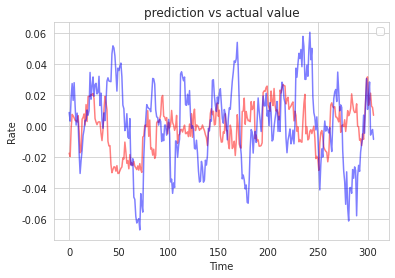

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KODEX골드선물_predict = predict_data('2016-03-04', 'KODEX골드선물(H).csv')
KODEX골드선물_combined_predict = merge_data_set(KODEX골드선물_predict, feature_list)
test=KODEX골드선물_combined_predict.iloc[-num:]
test.drop(['Date', 'KODEX골드선물(H)_Close','KODEX골드선물(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(6, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_KODEX골드선물 = lgbm.predict(test)
pred_KODEX골드선물=pd.DataFrame({"prediction":pred_KODEX골드선물})
pred_KODEX골드선물.index = ['KODEX골드선물']

pred_KODEX골드선물.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER원유선물

In [ ]:
feature_list = total_feature_list
TIGER원유선물_combined = merge_data_set(TIGER원유선물, feature_list)
TIGER원유선물_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,TIGER코스닥150_Volume,TIGER유로스탁스50(H)_Volume,KOSEF국고채10년_Volume,KODEX골드선물(H)_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume,KOSEF미국달러선물_Volume,TIGER차이나CSI300_Volume,KOSEF단기자금_Volume,TIGER단기선진하이일드(H)_Volume
1532,2022-05-26,5585,5615,5570,5585,107893,0.069830,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167
1533,2022-05-27,5745,5785,5735,5745,214061,0.070496,1860.699951,8.895,115.300003,...,5885635,332,4403,214061,49455,8617,2094,22553,7765,37
1534,2022-05-30,5805,5855,5805,5835,174185,0.030848,1860.699951,8.895,115.300003,...,5384386,1387,7401,174185,77031,10109,1951,43495,3919,2738
1535,2022-05-31,5915,6000,5885,5985,232165,-0.014202,1862.099976,8.916,119.980003,...,5485464,3135,6087,232165,84087,25461,474,70637,47453,816
1536,2022-06-02,5715,5730,5630,5710,224767,0.042032,1868.699951,9.057,117.769997,...,5957733,2035,6859,224767,23492,25208,79,51783,3388,1016


In [ ]:
TIGER원유선물_combined.drop(['Date', 'TIGER원유선물(H)_Close','TIGER원유선물(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER원유선물_combined.drop('Rate', axis=1)
y = TIGER원유선물_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.10149332357783061), 최대(0.10058050857103781)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.49698795, 0.50150602, 0.50090744, ..., 0.38086006, 0.78612629,
        0.        ],
       [0.53915663, 0.55271084, 0.54325469, ..., 0.36200517, 1.        ,
        1.        ],
       [0.58283133, 0.58283133, 0.56594071, ..., 0.37609641, 0.21798984,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 0.26899409,
        0.00877789],
       [1.        , 1.        , 1.        , ..., 0.00826143, 1.        ,
        0.0025247 ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.23244449,
        0.0031754 ]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 8
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1530, 8, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1530, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1530, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.05912557919236722
MAE: 0.04839415908828704
R2: -6.320204023968253


No handles with labels found to put in legend.


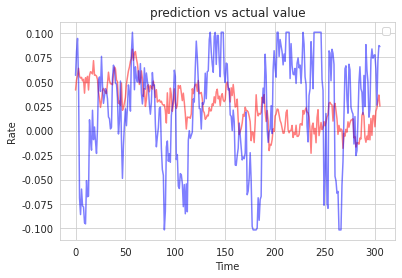

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER원유선물_predict = predict_data('2016-03-04', 'TIGER원유선물(H).csv')
TIGER원유선물_combined_predict = merge_data_set(TIGER원유선물_predict, feature_list)
test=TIGER원유선물_combined_predict.iloc[-num:]
test.drop(['Date', 'TIGER원유선물(H)_Close','TIGER원유선물(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(8, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_TIGER원유선물 = lgbm.predict(test)
pred_TIGER원유선물=pd.DataFrame({"prediction":pred_TIGER원유선물})
pred_TIGER원유선물.index = ['TIGER원유선물']

pred_TIGER원유선물.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KOSEF미국달러선물


In [ ]:
feature_list = total_feature_list
KOSEF미국달러선물_combined = merge_data_set(KOSEF미국달러선물, feature_list)
KOSEF미국달러선물_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,TIGER코스닥150_Volume,TIGER유로스탁스50(H)_Volume,KOSEF국고채10년_Volume,KODEX골드선물(H)_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume,KOSEF미국달러선물_Volume,TIGER차이나CSI300_Volume,KOSEF단기자금_Volume,TIGER단기선진하이일드(H)_Volume
1532,2022-05-26,13260,13305,13235,13280,5181,0.013931,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167
1533,2022-05-27,13225,13225,13125,13165,4403,0.025066,1860.699951,8.895,115.300003,...,5885635,332,4403,214061,49455,8617,2094,22553,7765,37
1534,2022-05-30,13100,13130,12980,12985,7401,0.042742,1860.699951,8.895,115.300003,...,5384386,1387,7401,174185,77031,10109,1951,43495,3919,2738
1535,2022-05-31,12955,13015,12950,12975,6087,0.040462,1862.099976,8.916,119.980003,...,5485464,3135,6087,232165,84087,25461,474,70637,47453,816
1536,2022-06-02,13060,13140,13060,13130,6859,0.028561,1868.699951,9.057,117.769997,...,5957733,2035,6859,224767,23492,25208,79,51783,3388,1016


In [ ]:
KOSEF미국달러선물_combined.drop(['Date', 'KOSEF미국달러선물_Close','KOSEF미국달러선물_Volume'], axis=1, inplace=True)

In [ ]:
X = KOSEF미국달러선물_combined.drop('Rate', axis=1)
y = KOSEF미국달러선물_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.02267151418721507), 최대(0.026231629967911525)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.38423898,  0.41904723,  0.33246456, ...,  0.1472295 ,
         2.28639659, -0.30565683],
       [ 0.15739838,  0.22616288,  0.21458224, ...,  0.0762112 ,
         3.08315851,  3.74128088],
       [ 0.20800129,  0.28524458,  0.20591442, ...,  0.12928686,
         0.16986951,  3.74128088],
       ...,
       [ 1.79204666,  1.8126801 ,  1.79697906, ..., -1.28730785,
         0.35988   , -0.27013324],
       [ 1.79204666,  1.8126801 ,  1.79697906, ..., -1.25619057,
         3.08315851, -0.29543952],
       [ 1.79204666,  1.8126801 ,  1.79697906, ..., -1.28730785,
         0.22371864, -0.29280619]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 8
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1530, 8, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1530, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1530, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.008783964492134231
MAE: 0.006945509047737232
R2: 0.25931990005152517


No handles with labels found to put in legend.


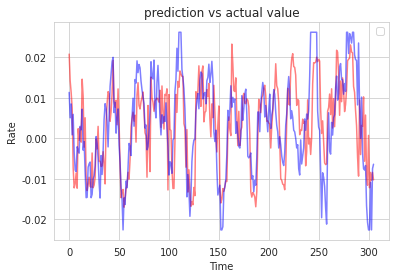

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KOSEF미국달러선물_predict = predict_data('2016-03-04', 'KOSEF미국달러선물.csv')
KOSEF미국달러선물_combined_predict = merge_data_set(KOSEF미국달러선물_predict, feature_list)
test=KOSEF미국달러선물_combined_predict.iloc[-num:]
test.drop(['Date', 'KOSEF미국달러선물_Close','KOSEF미국달러선물_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(8, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_KOSEF미국달러선물 = lgbm.predict(test)
pred_KOSEF미국달러선물=pd.DataFrame({"prediction":pred_KOSEF미국달러선물})
pred_KOSEF미국달러선물.index = ['KOSEF미국달러선물']

pred_KOSEF미국달러선물.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KOSEF미국달러선물인버스


In [ ]:
feature_list = total_feature_list
KOSEF미국달러선물인버스_combined = merge_data_set(KOSEF미국달러선물인버스, feature_list)
KOSEF미국달러선물인버스_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,TIGER코스닥150_Volume,TIGER유로스탁스50(H)_Volume,KOSEF국고채10년_Volume,KODEX골드선물(H)_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume,KOSEF미국달러선물_Volume,TIGER차이나CSI300_Volume,KOSEF단기자금_Volume,TIGER단기선진하이일드(H)_Volume
1532,2022-05-26,9445,9445,9400,9430,1409,-0.014316,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167
1533,2022-05-27,9465,9525,9460,9510,7765,-0.023659,1860.699951,8.895,115.300003,...,5885635,332,4403,214061,49455,8617,2094,22553,7765,37
1534,2022-05-30,9555,9635,9525,9635,3919,-0.039958,1860.699951,8.895,115.300003,...,5384386,1387,7401,174185,77031,10109,1951,43495,3919,2738
1535,2022-05-31,9630,9660,9600,9655,47453,-0.039358,1862.099976,8.916,119.980003,...,5485464,3135,6087,232165,84087,25461,474,70637,47453,816
1536,2022-06-02,9575,9575,9525,9535,3388,-0.027792,1868.699951,9.057,117.769997,...,5957733,2035,6859,224767,23492,25208,79,51783,3388,1016


In [ ]:
KOSEF미국달러선물인버스_combined.drop(['Date', 'KOSEF미국달러선물인버스_Close','KOSEF미국달러선물인버스_Volume'], axis=1, inplace=True)

In [ ]:
X = KOSEF미국달러선물인버스_combined.drop('Rate', axis=1)
y = KOSEF미국달러선물인버스_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.025923929272929414), 최대(0.0225697256472086)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.7314237 , -0.58550223, -0.68832044, ...,  0.1472295 ,
         2.28639659, -0.30565683],
       [-0.48869189, -0.49461112, -0.50347141, ...,  0.0762112 ,
         3.08315851,  3.74128088],
       [-0.49880571, -0.54510618, -0.57535714, ...,  0.12928686,
         0.16986951,  3.74128088],
       ...,
       [-1.73471518, -1.71659162, -1.73785216, ..., -1.28730785,
         0.35988   , -0.27013324],
       [-1.73471518, -1.71659162, -1.73785216, ..., -1.25619057,
         3.08315851, -0.29543952],
       [-1.73471518, -1.71659162, -1.73785216, ..., -1.28730785,
         0.22371864, -0.29280619]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 8
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1530, 8, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1530, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1530, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.00881132929822915
MAE: 0.006930533332890192
R2: 0.21051914740676858


No handles with labels found to put in legend.


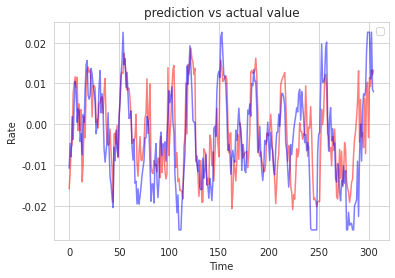

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KOSEF미국달러선물인버스_predict = predict_data('2016-03-04', 'KOSEF미국달러선물인버스.csv')
KOSEF미국달러선물인버스_combined_predict = merge_data_set(KOSEF미국달러선물인버스_predict, feature_list)
test=KOSEF미국달러선물인버스_combined_predict.iloc[-num:]
test.drop(['Date', 'KOSEF미국달러선물인버스_Close','KOSEF미국달러선물인버스_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(8, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_KOSEF미국달러선물인버스 = lgbm.predict(test)
pred_KOSEF미국달러선물인버스=pd.DataFrame({"prediction":pred_KOSEF미국달러선물인버스})
pred_KOSEF미국달러선물인버스.index = ['KOSEF미국달러선물인버스']

pred_KOSEF미국달러선물인버스.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KOSEF국고채10년


In [ ]:
feature_list = total_feature_list
KOSEF국고채10년_combined = merge_data_set(KOSEF국고채10년, feature_list)
KOSEF국고채10년_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,TIGER코스닥150_Volume,TIGER유로스탁스50(H)_Volume,KOSEF국고채10년_Volume,KODEX골드선물(H)_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume,KOSEF미국달러선물_Volume,TIGER차이나CSI300_Volume,KOSEF단기자금_Volume,TIGER단기선진하이일드(H)_Volume
1532,2022-05-26,112200,112200,111115,111475,13623,-0.031352,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167
1533,2022-05-27,111700,111950,111475,111785,8617,-0.035649,1860.699951,8.895,115.300003,...,5885635,332,4403,214061,49455,8617,2094,22553,7765,37
1534,2022-05-30,110950,112005,110950,111825,10109,-0.046188,1860.699951,8.895,115.300003,...,5384386,1387,7401,174185,77031,10109,1951,43495,3919,2738
1535,2022-05-31,111530,111600,110690,110750,25461,-0.033499,1862.099976,8.916,119.980003,...,5485464,3135,6087,232165,84087,25461,474,70637,47453,816
1536,2022-06-02,110245,110535,109570,109900,25208,-0.030073,1868.699951,9.057,117.769997,...,5957733,2035,6859,224767,23492,25208,79,51783,3388,1016


In [ ]:
KOSEF국고채10년_combined.drop(['Date', 'KOSEF국고채10년_Close','KOSEF국고채10년_Volume'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(KOSEF국고채10년_combined, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_1 = MinMaxScaler()
scaler_target = MinMaxScaler()

train[train.columns.drop('Rate')] = scaler_1.fit_transform(train[train.columns.drop('Rate')])
test[train.columns.drop('Rate')] = scaler_1.transform(test[train.columns.drop('Rate')])

train[['Rate']] = scaler_target.fit_transform(train[['Rate']])
test[['Rate']] = scaler_target.transform(test[['Rate']])

In [ ]:
# Creating a data structure with n timesteps and 1 output
time_step = 8
y = train.Rate
train.drop('Rate', axis=1, inplace=True)
X_train = []
y_train = []
for i in range(time_step,len(train)):
  X_train.append(train.iloc[i-time_step:i,])
  y_train.append(y.iloc[i-time_step])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 41))
X_train.shape

(1221, 8, 41)

### Building model

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
num = np.maximum(int(time_step // 1.3), time_step-10)
# Initialising the RNN
regressor = Sequential()

# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units = num, activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 41)))
regressor.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = num, activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = num, activation='relu', return_sequences=True))
regressor.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = num, activation='relu'))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 [==============================] - 11s 22ms/step - loss: 0.1981
Epoch 2/100
39/39 [==============================] - 1s 22ms/step - loss: 0.0937
Epoch 3/100
39/39 [==============================] - 1s 25ms/step - loss: 0.0530
Epoch 4/100
39/39 [==============================] - 1s 24ms/step - loss: 0.0452
Epoch 5/100
39/39 [==============================] - 1s 22ms/step - loss: 0.0392
Epoch 6/100
39/39 [==============================] - 1s 24ms/step - loss: 0.0362
Epoch 7/100
39/39 [==============================] - 1s 25ms/step - loss: 0.0318
Epoch 8/100
39/39 [==============================] - 1s 24ms/step - loss: 0.0311
Epoch 9/100
39/39 [==============================] - 1s 22ms/step - loss: 0.0284
Epoch 10/100
39/39 [==============================] - 1s 22ms/step - loss: 0.0266
Epoch 11/100
39/39 [==============================] - 1s 23ms/step - loss: 0.0239
Epoch 12/100
39/39 [==============================] - 1s 22ms/step - loss: 0.0243
Epoch 13/100
39/39 [====

In [ ]:
# preprocessing the test dataset
# Creating a data structure with n timesteps
# 이전에 지정해주었던 test를 y_test로 사용하기로 한다.(Scaling은 되어 있음)
y_test = np.reshape(np.array(test.iloc[:,5]), (-1,1))
test.drop('Rate', axis=1, inplace=True)
total_data = np.concatenate([train, test], axis=0)

X_test = []
for i in range(len(total_data)-len(test), len(total_data)):
  X_test.append(total_data[i-time_step:i,:])
X_test = np.array(X_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 41))
X_test.shape

print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X_test: (308, 8, 41)
shape of y_test: (308, 1)


In [ ]:
real = y_test
pred= regressor.predict(X_test)
real = scaler_target.inverse_transform(real)
pred = scaler_target.inverse_transform(pred)

print(f'RMSE: {np.sqrt(mean_squared_error(pred,real))}')
print(f'MAE: {mean_absolute_error(pred,real)}')
print(f'R2: {r2_score(pred, real)}')

RMSE: 0.015389251854627839
MAE: 0.011890710523674165
R2: -0.854903260377472


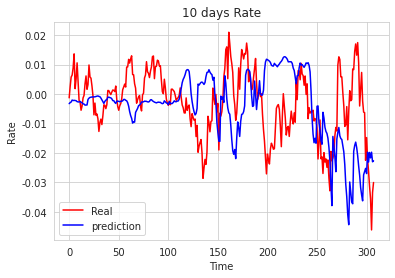

In [ ]:
# Visualising the results
plt.plot(real, color = 'red', label = 'Real')
plt.plot(pred, color = 'blue', label = 'prediction')
plt.title('10 days Rate')
plt.xlabel('Time')
plt.ylabel("Rate")
plt.legend(loc='best')
plt.show()

In [ ]:
regressor.save('국고채model.h5')

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KOSEF국고채10년_predict = predict_data('2016-03-04', 'KOSEF국고채10년.csv')
KOSEF국고채10년_combined_predict = merge_data_set(KOSEF국고채10년_predict, feature_list)
test=KOSEF국고채10년_combined_predict.iloc[-time_step:]
test.drop(['Date', 'KOSEF국고채10년_Close','KOSEF국고채10년_Volume'],axis=1,inplace=True)

test=scaler_1.transform(test)
test.shape

(8, 41)

In [ ]:
test=test.reshape(1,time_step,41)
pred_KOSEF국고채10년 = regressor.predict(test)
pred_KOSEF국고채10년 = scaler_target.inverse_transform(pred_KOSEF국고채10년)[0]
pred_KOSEF국고채10년=pd.DataFrame({"prediction":pred_KOSEF국고채10년})
pred_KOSEF국고채10년.index = ['KOSEF국고채10년']

pred_KOSEF국고채10년.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

AttributeError: ignored

### KBSTAR중기우량회사채

In [ ]:
feature_list = total_feature_list
KBSTAR중기우량회사채_combined = merge_data_set(KBSTAR중기우량회사채, feature_list)
KBSTAR중기우량회사채_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,TIGER코스닥150_Volume,TIGER유로스탁스50(H)_Volume,KOSEF국고채10년_Volume,KODEX골드선물(H)_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume,KOSEF미국달러선물_Volume,TIGER차이나CSI300_Volume,KOSEF단기자금_Volume,TIGER단기선진하이일드(H)_Volume
1532,2022-05-26,102720,102720,102560,102685,802,-0.008765,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167
1533,2022-05-27,102670,102670,102585,102630,2094,-0.011254,1860.699951,8.895,115.300003,...,5885635,332,4403,214061,49455,8617,2094,22553,7765,37
1534,2022-05-30,102710,102775,102710,102775,1951,-0.014595,1860.699951,8.895,115.300003,...,5384386,1387,7401,174185,77031,10109,1951,43495,3919,2738
1535,2022-05-31,102620,102635,102455,102535,474,-0.013264,1862.099976,8.916,119.980003,...,5485464,3135,6087,232165,84087,25461,474,70637,47453,816
1536,2022-06-02,102510,102515,102300,102375,79,-0.013431,1868.699951,9.057,117.769997,...,5957733,2035,6859,224767,23492,25208,79,51783,3388,1016


In [ ]:
KBSTAR중기우량회사채_combined.drop(['Date', 'KBSTAR중기우량회사채_Close','KBSTAR중기우량회사채_Volume'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(KBSTAR중기우량회사채_combined, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_1 = MinMaxScaler()
scaler_target = MinMaxScaler()

train[train.columns.drop('Rate')] = scaler_1.fit_transform(train[train.columns.drop('Rate')])
test[train.columns.drop('Rate')] = scaler_1.transform(test[train.columns.drop('Rate')])

train[['Rate']] = scaler_target.fit_transform(train[['Rate']])
test[['Rate']] = scaler_target.transform(test[['Rate']])

In [ ]:
# Creating a data structure with n timesteps and 1 output
time_step = 30
y = train.Rate
train.drop('Rate', axis=1, inplace=True)
X_train = []
y_train = []
for i in range(time_step,len(train)):
  X_train.append(train.iloc[i-time_step:i,])
  y_train.append(y.iloc[i-time_step])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 41))
X_train.shape

(1199, 30, 41)

### Building model

In [ ]:
num = np.maximum(int(time_step // 1.3), time_step-10)
# Initialising the RNN
regressor = Sequential()

# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units = num, activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 41)))
# Adding a second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = num, activation='relu', return_sequences = True))
# Adding a third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = num, activation='relu', return_sequences=True))
# Adding a fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = num, activation='relu'))
# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 82ms/step - loss: 0.2104
Epoch 2/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0211
Epoch 3/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0186
Epoch 4/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0205
Epoch 5/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0185
Epoch 6/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0180
Epoch 7/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0173
Epoch 8/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0162
Epoch 9/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0161
Epoch 10/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0160
Epoch 11/100
38/38 [==============================] - 2s 53ms/step - loss: 0.0157
Epoch 12/100
38/38 [==============================] - 2s 53ms/step - loss: 0.0152
Epoch 13/100
38/38 [====

In [ ]:
# preprocessing the test dataset
# Creating a data structure with n timesteps
# 이전에 지정해주었던 test를 y_test로 사용하기로 한다.(Scaling은 되어 있음)
y_test = np.reshape(np.array(test.iloc[:,5]), (-1,1))
test.drop('Rate', axis=1, inplace=True)
total_data = np.concatenate([train, test], axis=0)

X_test = []
for i in range(len(total_data)-len(test), len(total_data)):
  X_test.append(total_data[i-time_step:i,:])
X_test = np.array(X_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 41))
X_test.shape

print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X_test: (308, 30, 41)
shape of y_test: (308, 1)


In [ ]:
real = y_test
pred= regressor.predict(X_test)
real = scaler_target.inverse_transform(real)
pred = scaler_target.inverse_transform(pred)

print(f'RMSE: {np.sqrt(mean_squared_error(pred,real))}')
print(f'MAE: {mean_absolute_error(pred,real)}')
print(f'R2: {r2_score(pred, real)}')

RMSE: 0.004253207878064136
MAE: 0.0034043991340972422
R2: -3.1992745978698256


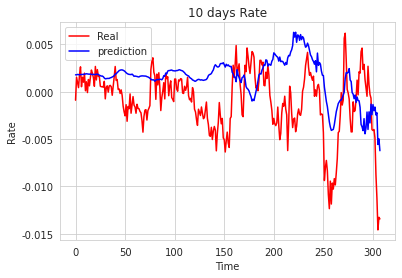

In [ ]:
# Visualising the results
plt.plot(real, color = 'red', label = 'Real')
plt.plot(pred, color = 'blue', label = 'prediction')
plt.title('10 days Rate')
plt.xlabel('Time')
plt.ylabel("Rate")
plt.legend(loc='best')
plt.show()

In [ ]:
regressor.save('중기우량회사채.h5')

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KBSTAR중기우량회사채_predict = predict_data('2016-03-04', 'KBSTAR중기우량회사채.csv')
KBSTAR중기우량회사채_combined_predict = merge_data_set(KBSTAR중기우량회사채_predict, feature_list)
test=KBSTAR중기우량회사채_combined_predict.iloc[-time_step:,:]
test.drop(['Date', 'KOSEF국고채10년_Close','KOSEF국고채10년_Volume'],axis=1,inplace=True)

test=scaler_1.transform(test)
test.shape

(30, 41)

In [ ]:
test=test.reshape(1,time_step,41)
pred_KBSTAR중기우량회사채 = regressor.predict(test)
pred_KBSTAR중기우량회사채 = scaler_target.inverse_transform(pred_KBSTAR중기우량회사채)[0]
pred_KBSTAR중기우량회사채=pd.DataFrame({"prediction":pred_KBSTAR중기우량회사채})
pred_KBSTAR중기우량회사채.index = ['KBSTAR중기우량회사채']

pred_KBSTAR중기우량회사채.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER단기선진하이일드


In [ ]:
feature_list = total_feature_list
TIGER단기선진하이일드_combined = merge_data_set(TIGER단기선진하이일드, feature_list)
TIGER단기선진하이일드_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,TIGER코스닥150_Volume,TIGER유로스탁스50(H)_Volume,KOSEF국고채10년_Volume,KODEX골드선물(H)_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume,KOSEF미국달러선물_Volume,TIGER차이나CSI300_Volume,KOSEF단기자금_Volume,TIGER단기선진하이일드(H)_Volume
1532,2022-05-26,11900,11900,11840,11840,765,-0.007179,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167
1533,2022-05-27,11900,11900,11895,11895,6539,-0.028583,1860.699951,8.895,115.300003,...,5885635,332,4403,214061,49455,8617,2094,22553,7765,37
1534,2022-05-30,11985,12070,11985,12050,1645,-0.046058,1860.699951,8.895,115.300003,...,5384386,1387,7401,174185,77031,10109,1951,43495,3919,2738
1535,2022-05-31,12075,12075,12005,12065,1091,-0.037298,1862.099976,8.916,119.980003,...,5485464,3135,6087,232165,84087,25461,474,70637,47453,816
1536,2022-06-02,12055,12055,11965,12050,3418,-0.043568,1868.699951,9.057,117.769997,...,5957733,2035,6859,224767,23492,25208,79,51783,3388,1016


In [ ]:
TIGER단기선진하이일드_combined.drop(['Date', 'TIGER단기선진하이일드(H)_Close','TIGER단기선진하이일드(H)_Volume'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(KOSEF국고채10년_combined, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_1 = MinMaxScaler()
scaler_target = MinMaxScaler()

train[train.columns.drop('Rate')] = scaler_1.fit_transform(train[train.columns.drop('Rate')])
test[train.columns.drop('Rate')] = scaler_1.transform(test[train.columns.drop('Rate')])

train[['Rate']] = scaler_target.fit_transform(train[['Rate']])
test[['Rate']] = scaler_target.transform(test[['Rate']])

In [ ]:
# Creating a data structure with n timesteps and 1 output
time_step = 15
y = train.Rate
train.drop('Rate', axis=1, inplace=True)
X_train = []
y_train = []
for i in range(time_step,len(train)):
  X_train.append(train.iloc[i-time_step:i,:])
  y_train.append(y.iloc[i-time_step])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 41))
X_train.shape

(1214, 15, 41)

### Building model

In [ ]:
num = np.maximum(int(time_step // 1.3), time_step-10)
# Initialising the RNN
regressor = Sequential()

# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units = num, activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 41)))
regressor.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = num, activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = num, activation='relu', return_sequences=True))
regressor.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = num, activation='relu'))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 38ms/step - loss: 0.2717
Epoch 2/100
38/38 [==============================] - 1s 36ms/step - loss: 0.0545
Epoch 3/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0452
Epoch 4/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0358
Epoch 5/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0334
Epoch 6/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0310
Epoch 7/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0286
Epoch 8/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0285
Epoch 9/100
38/38 [==============================] - 1s 26ms/step - loss: 0.0242
Epoch 10/100
38/38 [==============================] - 1s 26ms/step - loss: 0.0242
Epoch 11/100
38/38 [==============================] - 1s 26ms/step - loss: 0.0235
Epoch 12/100
38/38 [==============================] - 1s 26ms/step - loss: 0.0221
Epoch 13/100
38/38 [====

In [ ]:
# preprocessing the test dataset
# Creating a data structure with n timesteps
# 이전에 지정해주었던 test를 y_test로 사용하기로 한다.(Scaling은 되어 있음)
y_test = np.reshape(np.array(test.iloc[:,5]), (-1,1))
test.drop('Rate', axis=1, inplace=True)
total_data = np.concatenate([train, test], axis=0)

X_test = []
for i in range(len(total_data)-len(test), len(total_data)):
  X_test.append(total_data[i-time_step:i,:])
X_test = np.array(X_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 41))
X_test.shape

print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X_test: (308, 15, 41)
shape of y_test: (308, 1)


In [ ]:
real = y_test
pred= regressor.predict(X_test)
real = scaler_target.inverse_transform(real)
pred = scaler_target.inverse_transform(pred)

print(f'RMSE: {np.sqrt(mean_squared_error(pred,real))}')
print(f'MAE: {mean_absolute_error(pred,real)}')
print(f'R2: {r2_score(pred, real)}')

RMSE: 0.01269299614219632
MAE: 0.010325706021346125
R2: -8.36120586665849


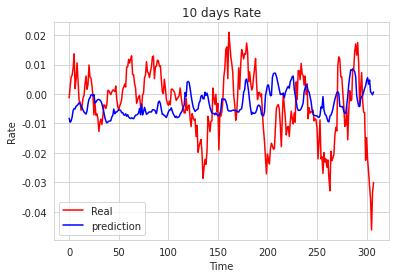

In [ ]:
# Visualising the results
plt.plot(real, color = 'red', label = 'Real')
plt.plot(pred, color = 'blue', label = 'prediction')
plt.title('10 days Rate')
plt.xlabel('Time')
plt.ylabel("Rate")
plt.legend(loc='best')
plt.show()

In [ ]:
regressor.save('단기선진하이일드.h5')

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER단기선진하이일드_predict = predict_data('2016-03-04', 'TIGER단기선진하이일드(H).csv')
TIGER단기선진하이일드_combined_predict = merge_data_set(TIGER단기선진하이일드_predict, feature_list)
test= TIGER단기선진하이일드_combined_predict.iloc[-time_step:]
test.drop(['Date', 'TIGER단기선진하이일드(H)_Close','TIGER단기선진하이일드(H)_Volume'],axis=1,inplace=True)

test=scaler_1.transform(test)
test.shape

(15, 41)

In [ ]:
test=test.reshape(1,time_step,41)
pred_TIGER단기선진하이일드 = regressor.predict(test)
pred_TIGER단기선진하이일드 = scaler_target.inverse_transform(pred_TIGER단기선진하이일드)[0]
pred_TIGER단기선진하이일드=pd.DataFrame({"prediction":pred_TIGER단기선진하이일드})
pred_TIGER단기선진하이일드.index = ['TIGER단기선진하이일드']

pred_TIGER단기선진하이일드.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KOSEF단기자금


In [ ]:
feature_list = total_feature_list
KOSEF단기자금_combined = merge_data_set(KOSEF단기자금, feature_list)
KOSEF단기자금_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,TIGER코스닥150_Volume,TIGER유로스탁스50(H)_Volume,KOSEF국고채10년_Volume,KODEX골드선물(H)_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume,KOSEF미국달러선물_Volume,TIGER차이나CSI300_Volume,KOSEF단기자금_Volume,TIGER단기선진하이일드(H)_Volume
1532,2022-05-26,101390,101390,101310,101355,5572,0.000395,1847.400024,9.401,114.830002,...,6777076,5572,5181,107893,14209,13623,802,24393,1409,10167
1533,2022-05-27,101355,101360,101350,101360,332,0.000247,1860.699951,8.895,115.300003,...,5885635,332,4403,214061,49455,8617,2094,22553,7765,37
1534,2022-05-30,101355,101370,101355,101365,1387,-0.000049,1860.699951,8.895,115.300003,...,5384386,1387,7401,174185,77031,10109,1951,43495,3919,2738
1535,2022-05-31,101360,101370,101360,101365,3135,-0.000543,1862.099976,8.916,119.980003,...,5485464,3135,6087,232165,84087,25461,474,70637,47453,816
1536,2022-06-02,101380,101385,101370,101375,2035,-0.000691,1868.699951,9.057,117.769997,...,5957733,2035,6859,224767,23492,25208,79,51783,3388,1016


In [ ]:
KOSEF단기자금_combined.drop(['Date', 'KOSEF단기자금_Close','KOSEF단기자금_Volume'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(KOSEF국고채10년_combined, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_1 = MinMaxScaler()
scaler_target = MinMaxScaler()

train[train.columns.drop('Rate')] = scaler_1.fit_transform(train[train.columns.drop('Rate')])
test[train.columns.drop('Rate')] = scaler_1.transform(test[train.columns.drop('Rate')])

train[['Rate']] = scaler_target.fit_transform(train[['Rate']])
test[['Rate']] = scaler_target.transform(test[['Rate']])

In [ ]:
# Creating a data structure with n timesteps and 1 output
time_step = 30
y = train.Rate
train.drop('Rate', axis=1, inplace=True)
X_train = []
y_train = []
for i in range(time_step,len(train)):
  X_train.append(train.iloc[i-time_step:i,])
  y_train.append(y.iloc[i-time_step])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 41))
X_train.shape

(1199, 30, 41)

### Building model

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
num = np.maximum(int(time_step // 1.3), time_step-10)
# Initialising the RNN
regressor = Sequential()

# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units = num, activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 41)))
regressor.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = num, activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = num, activation='relu', return_sequences=True))
regressor.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = num, activation='relu'))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 80ms/step - loss: 0.1295
Epoch 2/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0328
Epoch 3/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0294
Epoch 4/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0259
Epoch 5/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0256
Epoch 6/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0238
Epoch 7/100
38/38 [==============================] - 2s 53ms/step - loss: 0.0247
Epoch 8/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0222
Epoch 9/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0215
Epoch 10/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0213
Epoch 11/100
38/38 [==============================] - 2s 53ms/step - loss: 0.0209
Epoch 12/100
38/38 [==============================] - 2s 50ms/step - loss: 0.0220
Epoch 13/100
38/38 [====

In [ ]:
# preprocessing the test dataset
# Creating a data structure with n timesteps
# 이전에 지정해주었던 test를 y_test로 사용하기로 한다.(Scaling은 되어 있음)
y_test = np.reshape(np.array(test.iloc[:,5]), (-1,1))
test.drop('Rate', axis=1, inplace=True)
total_data = np.concatenate([train, test], axis=0)

X_test = []
for i in range(len(total_data)-len(test), len(total_data)):
  X_test.append(total_data[i-time_step:i,:])
X_test = np.array(X_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 41))
X_test.shape

print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X_test: (308, 30, 41)
shape of y_test: (308, 1)


In [ ]:
real = y_test
pred= regressor.predict(X_test)
real = scaler_target.inverse_transform(real)
pred = scaler_target.inverse_transform(pred)

print(f'RMSE: {np.sqrt(mean_squared_error(pred,real))}')
print(f'MAE: {mean_absolute_error(pred,real)}')
print(f'R2: {r2_score(pred, real)}')

RMSE: 0.014519617988701397
MAE: 0.011671958584889251
R2: -4.045017890545803


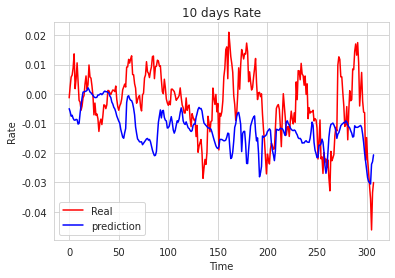

In [ ]:
# Visualising the results
plt.plot(real, color = 'red', label = 'Real')
plt.plot(pred, color = 'blue', label = 'prediction')
plt.title('10 days Rate')
plt.xlabel('Time')
plt.ylabel("Rate")
plt.legend(loc='best')
plt.show()

In [ ]:
regressor.save('단기자금model.h5')

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KOSEF단기자금_predict = predict_data('2016-03-04', 'KOSEF단기자금.csv')
KOSEF단기자금_combined_predict = merge_data_set(KOSEF단기자금_predict, feature_list)
test=KOSEF단기자금_combined_predict.iloc[-time_step:,:]
test.drop(['Date', 'KOSEF단기자금_Close','KOSEF단기자금_Volume'],axis=1,inplace=True)

test=scaler_1.transform(test)
test.shape

(30, 41)

In [ ]:
test=test.reshape(1,time_step,41)
pred_KOSEF단기자금 = regressor.predict(test)
pred_KOSEF단기자금 = scaler_target.inverse_transform(pred_KOSEF단기자금)[0]
pred_KOSEF단기자금=pd.DataFrame({"prediction":pred_KOSEF단기자금})
pred_KOSEF단기자금.index = ['KOSEF단기자금']

pred_KOSEF단기자금.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)